Import the necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

Load the dataset

In [2]:
# Load the dataset
data = pd.read_csv('Tablet_press_data.csv')

print(data.head(10))

    Pressure  Temperature       Speed  Vibration   Humidity  \
0  62.512145    28.220422  758.141650   0.292994  49.799312   
1  69.941139    32.452611  590.881799   9.463787  48.547032   
2  60.912694    23.096572  741.749043   5.567093  58.904469   
3  76.515107    21.693767  680.608030   8.567299  61.665603   
4  82.498197    30.125321  669.042205   3.645664  46.897832   
5  58.826402    33.449210  718.949944   5.924830  64.884243   
6  86.409438    30.928606  775.330230   8.425345  30.455587   
7  53.852914    28.362896  640.642282   4.753591  59.968687   
8  94.694629    34.154427  730.366800   9.992073  38.395714   
9  90.328057    31.434920  934.824842   3.506427  55.201383   

   Maintenance_Cycles  Failure  
0                  13        0  
1                  10        1  
2                   6        1  
3                  12        1  
4                  13        0  
5                   8        1  
6                  16        1  
7                  10        0  
8        

Check for missing values

In [3]:
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())


Missing Values:
Pressure              0
Temperature           0
Speed                 0
Vibration             0
Humidity              0
Maintenance_Cycles    0
Failure               0
dtype: int64


Check the normally distributed


Normality Check (Shapiro-Wilk Test):
Pressure: Not normal (p-value=0.0000)
Temperature: Not normal (p-value=0.0000)
Speed: Not normal (p-value=0.0000)
Vibration: Not normal (p-value=0.0000)
Humidity: Not normal (p-value=0.0000)
Maintenance_Cycles: Not normal (p-value=0.0000)
Failure: Not normal (p-value=0.0000)


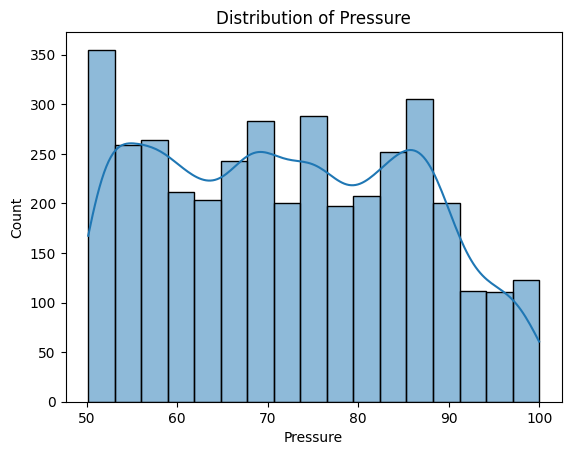

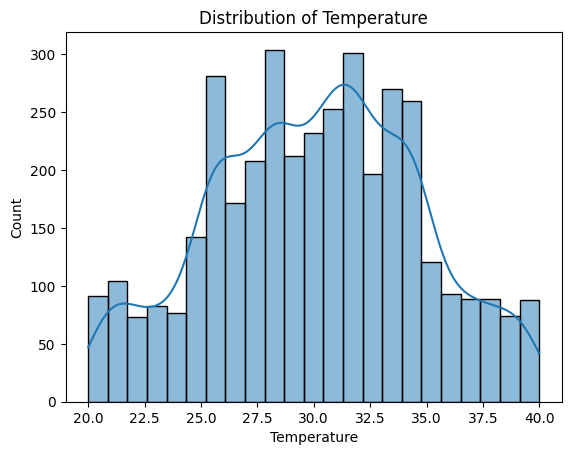

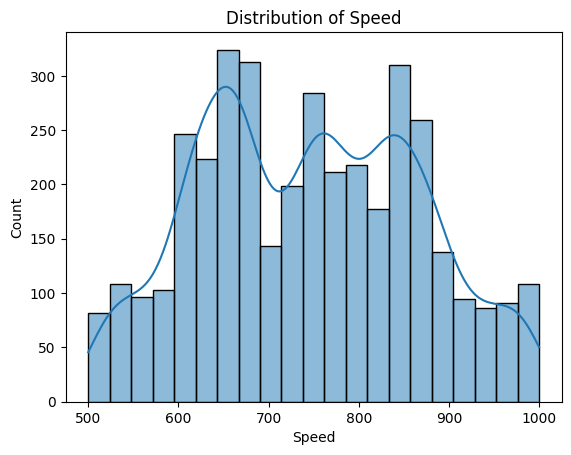

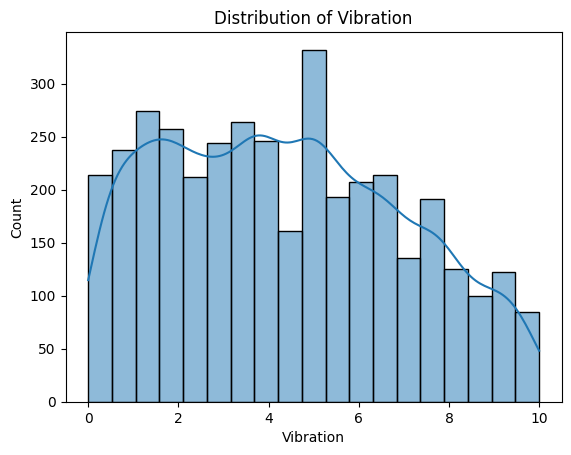

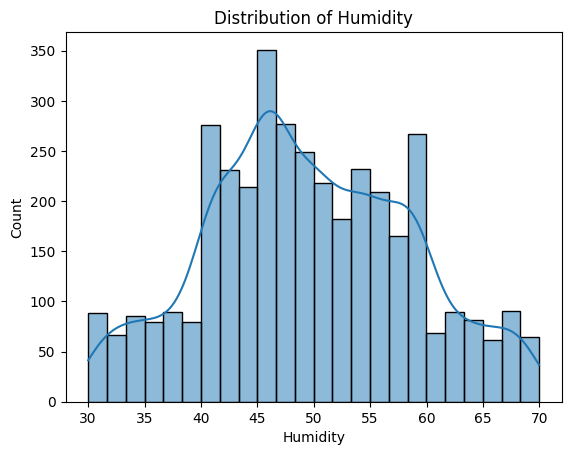

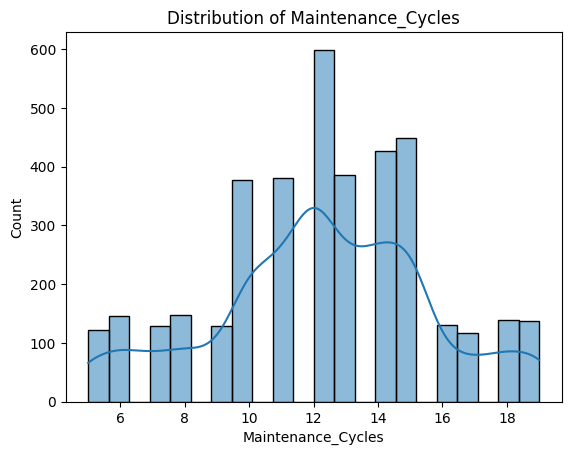

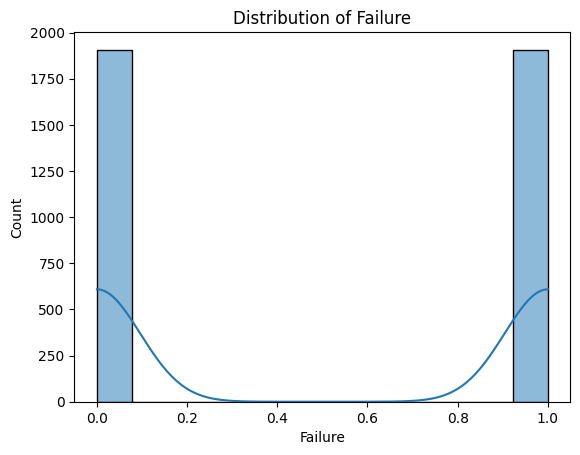

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from scipy.stats import shapiro

# Check if each feature is normally distributed
print("\nNormality Check (Shapiro-Wilk Test):")
for column in data.select_dtypes(include=[np.number]).columns:  # Select numeric columns
    stat, p_value = shapiro(data[column].dropna())  # Drop NA to avoid errors
    if p_value > 0.05:
        print(f"{column}: Likely normal (p-value={p_value:.4f})")
    else:
        print(f"{column}: Not normal (p-value={p_value:.4f})")

# Visualize the distribution of features
for column in data.select_dtypes(include=[np.number]).columns:
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

Check for outliers


Outlier Detection (IQR Method):
Pressure: 0 outliers


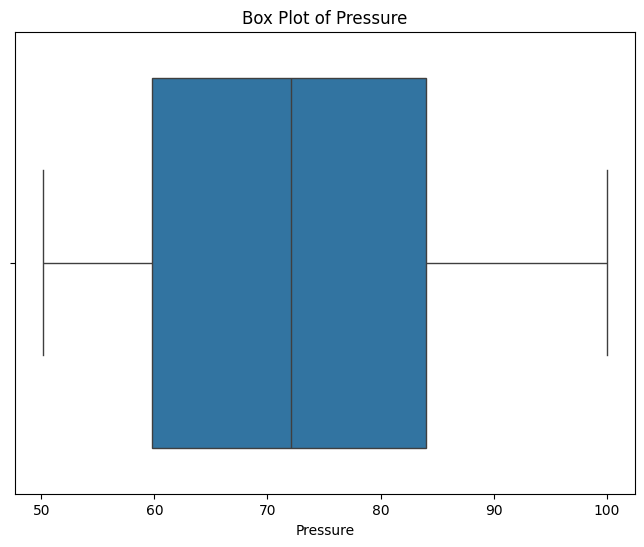

Temperature: 0 outliers


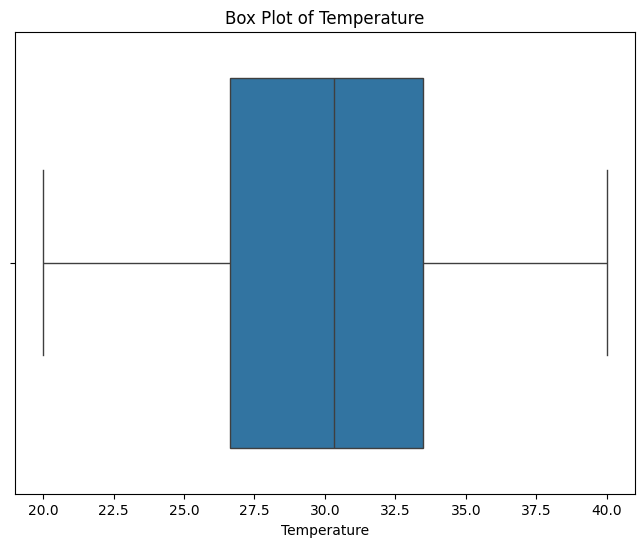

Speed: 0 outliers


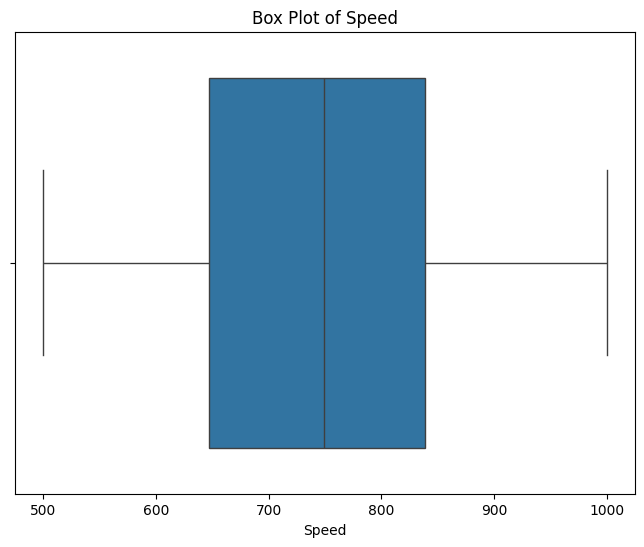

Vibration: 0 outliers


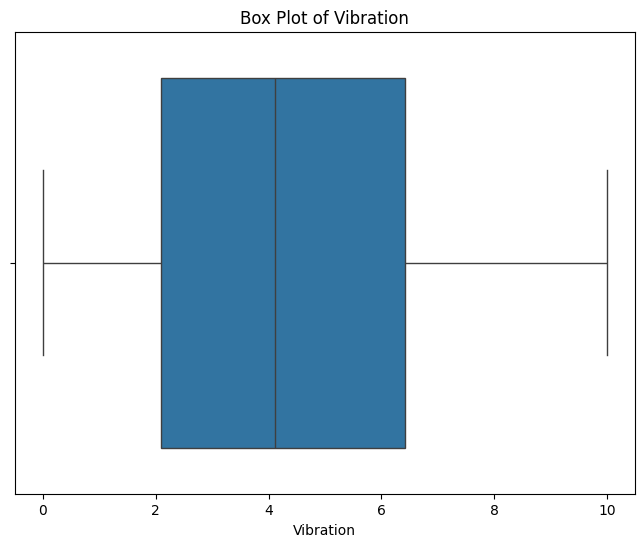

Humidity: 0 outliers


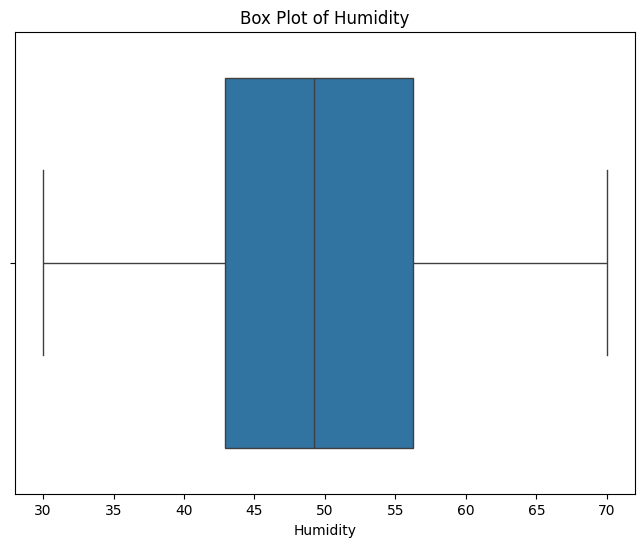

Maintenance_Cycles: 0 outliers


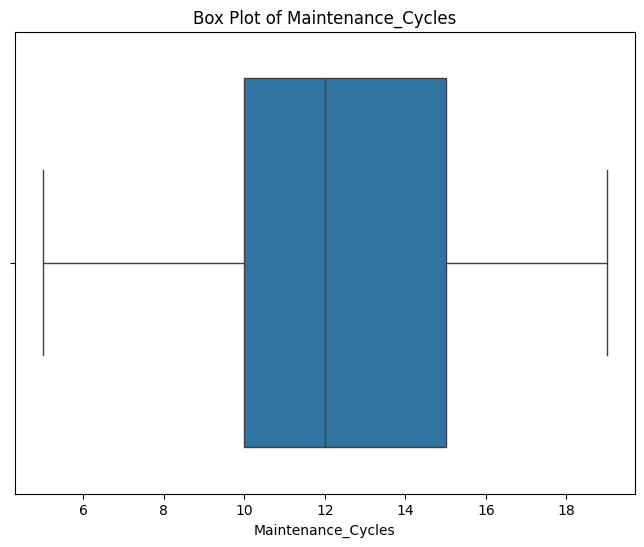

Failure: 0 outliers


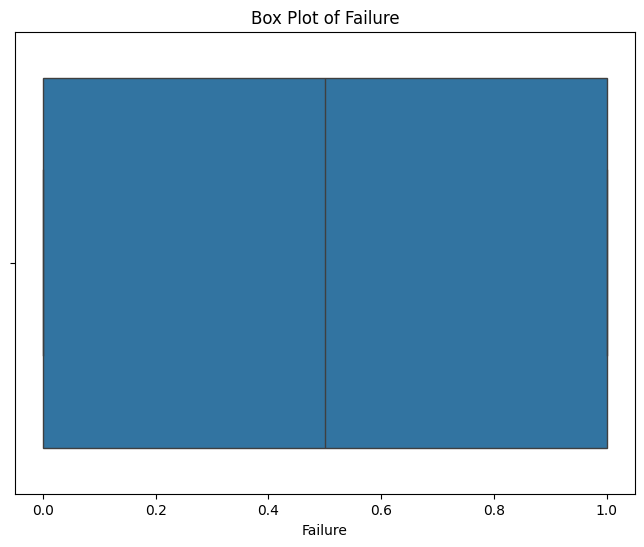

In [7]:
# Check for outliers using the IQR method
print("\nOutlier Detection (IQR Method):")
for column in data.select_dtypes(include=[np.number]).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers")

    # Plot boxplot for each feature
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

In [8]:

# Split the dataset into features (X) and target (y)
X = data.drop(columns=['Failure'])
y = data['Failure']


Standard scaling the features

In [9]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [11]:
# Define a KNN classifier and use GridSearchCV to find the best hyperparameters
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

Perform Cross validation to the found best model

In [12]:
# Perform cross-validation with the best model
best_knn = grid_search.best_estimator_
cross_val_scores = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='accuracy')

# Evaluate the best model on the test set
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Output the results

In [13]:
# Output the results
print("Best Hyperparameters:", grid_search.best_params_)
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())
print("Test Set Accuracy:", accuracy)
print("Classification Report:\n", classification_report_output)

Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Cross-Validation Scores: [0.96072013 0.98032787 0.9557377  0.96393443 0.95737705]
Mean Cross-Validation Score: 0.9636194360226449
Test Set Accuracy: 0.9567496723460026
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       382
           1       1.00      0.91      0.95       381

    accuracy                           0.96       763
   macro avg       0.96      0.96      0.96       763
weighted avg       0.96      0.96      0.96       763



# Ensemble KNN

In [14]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Create multiple KNN classifiers to form the ensemble
knn1 = KNeighborsClassifier(n_neighbors=3)
knn2 = KNeighborsClassifier(n_neighbors=5)
knn3 = KNeighborsClassifier(n_neighbors=7)

# Define a VotingClassifier using these KNN classifiers
ensemble_knn = VotingClassifier(estimators=[
    ('knn1', knn1),
    ('knn2', knn2),
    ('knn3', knn3)
], voting='hard')  # 'hard' voting for majority class

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'voting': ['hard', 'soft'],  # Hard (majority voting) or soft (probability averaging)
    'knn1__n_neighbors': [3, 5, 7],
    'knn2__n_neighbors': [3, 5, 7],
    'knn3__n_neighbors': [3, 5, 7]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(ensemble_knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Perform cross-validation with the best ensemble model
best_ensemble_knn = grid_search.best_estimator_
cross_val_scores = cross_val_score(best_ensemble_knn, X_train, y_train, cv=5, scoring='accuracy')

# Evaluate the best model on the test set
y_pred = best_ensemble_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Output results
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Accuracy on test set: {accuracy}")
print(f"Classification report:\n{classification_report_output}")


Cross-validation scores: [0.95908347 0.97868852 0.95245902 0.96229508 0.95737705]
Accuracy on test set: 0.9567496723460026
Classification report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       382
           1       1.00      0.91      0.95       381

    accuracy                           0.96       763
   macro avg       0.96      0.96      0.96       763
weighted avg       0.96      0.96      0.96       763

